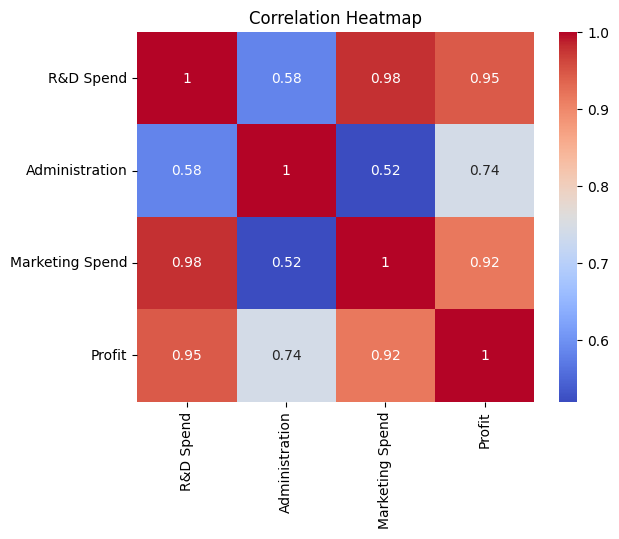

       0    1    2          3           4            5
0    0.0  0.0  1.0   165349.2    136897.8     471784.1
1    1.0  0.0  0.0   162597.7   151377.59    443898.53
2    0.0  1.0  0.0  153441.51   101145.55    407934.54
3    0.0  0.0  1.0  144372.41   118671.85    383199.62
4    0.0  1.0  0.0  142107.34    91391.77    366168.42
..   ...  ...  ...        ...         ...          ...
995  1.0  0.0  0.0    54135.0  118451.999  173232.6695
996  1.0  0.0  0.0   134970.0   130390.08  329204.0228
997  1.0  0.0  0.0  100275.47   241926.31    227142.82
998  1.0  0.0  0.0  128456.23   321652.14    281692.32
999  0.0  0.0  1.0  161181.72   270939.86    295442.17

[1000 rows x 6 columns]
[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.229724047706


0.9112695892268908

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from google.colab import files
import io

#uploaded = files.upload()

#companies = pd.read_csv(io.BytesIO(uploaded['1000_Companies.csv']))

companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:,:-1].values
Y = companies.iloc[:, 4].values

companies.head()
numeric_data = companies.select_dtypes(include=[np.number])
# Plot correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm') # numeric data is put into heat map , annot = true shows the correlation values , coolwarm means positive and negative should be separatd.
plt.title("Correlation Heatmap")
plt.show()

# we cannot deal with strings like New york so we will transform it in numbers:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Label encode the 'State' column (index 3)
labelEncoder = LabelEncoder()
X[:, 3] = labelEncoder.fit_transform(X[:, 3])

# Apply OneHotEncoder to column index 3
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)
X = ct.fit_transform(X)
print(pd.DataFrame(X))
X = X[:,1:]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size= 0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
y_pred

print(regressor.coef_)
print(regressor.intercept_)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
